<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** <span style="color:blue"> Andrés Lares Barragán</span> | <span style="color:green"> Ivette Landaverde Mercado</span>

**Fecha:**  28 de abril del 2021.  

**Expediente** : <span style="color:blue"> 724055 </span> | <span style="color:green"> 722626 </span>

**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 9: Clase 22
    
### [link de repositorio GitHub](https://github.com/AndresLaresBarragan/ProyectoConjunto_ALares_ILandaverde)

**Replicar el procedimiento para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.**

Recordando:
> Hay un principio general conocido como valoración neutral al riesgo, el cual establece que cualquier título que depende de otros títulos negociados puede valorarse bajo el supuesto de que el mundo es neutral al riesgo. El resultado demuestra ser muy útil en la práctica. *En un mundo neutral al riesgo, el rendimiento esperado de todos los títulos es la tasa de interés libre de riesgo*, y la tasa de descuento correcta para los flujos de efectivo esperados también es la tasa de interés libre de riesgo.

 > **El equivalente a la función de Black-Scholes se puede demostrar que es:**
 
> $$\large{
 \text{Valor actual de la opción} = V(S_0, T) = E^*(e^{-rT}  f(S_T)) = e^{-rT} E^*(f(S_T))}
$$

> **donde $f(S_T)$ representa la función de pago de la opción, que para el caso de una opción de venta es:**

$$\large{P(S(t),t)=max\{K-S(T),0\}}$$

### <span style="color:red"> Librerías:</span>

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)
from datetime import date

### <span style="color:red"> Funciones:</span>

In [3]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

#Función que regresa rendimientos logarítmicos:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

### <span style="color:blue"> Andrés Lares Barragán:</span>

In [ ]:
# Solución

### <span style="color:green"> Ivette Landaverde Mercado: </span>

In [1]:
# Solución 

In [7]:
#Algunos datos:
tickers = ["tsla"]
r = 0.007/360
fr = 360*r
##
tesla = web.YahooOptions('tsla')
tesla_opt = tesla.get_all_data().reset_index()
tesla_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-30,752.5,call,TSLA210430C00752500,...,2021-04-28 19:13:25,2021-04-28 18:46:18,"{'contractSymbol': 'TSLA210430C00752500', 'str..."
2021-04-30,550.0,call,TSLA210430C00550000,...,2021-04-28 19:13:25,2021-04-28 14:32:08,"{'contractSymbol': 'TSLA210430C00550000', 'str..."
2021-04-30,550.0,put,TSLA210430P00550000,...,2021-04-28 19:13:25,2021-04-28 18:48:03,"{'contractSymbol': 'TSLA210430P00550000', 'str..."
2021-04-30,805.0,put,TSLA210430P00805000,...,2021-04-28 19:13:25,2021-04-27 18:26:27,"{'contractSymbol': 'TSLA210430P00805000', 'str..."
2021-04-30,560.0,call,TSLA210430C00560000,...,2021-04-28 19:13:25,2021-04-28 15:29:44,"{'contractSymbol': 'TSLA210430C00560000', 'str..."
...,...,...,...,...,...,...,...
2023-03-17,1300.0,call,TSLA230317C01300000,...,2021-04-28 19:13:28,2021-04-27 19:41:15,"{'contractSymbol': 'TSLA230317C01300000', 'str..."
2023-03-17,850.0,put,TSLA230317P00850000,...,2021-04-28 19:13:28,2021-04-28 18:37:27,"{'contractSymbol': 'TSLA230317P00850000', 'str..."
2023-03-17,850.0,call,TSLA230317C00850000,...,2021-04-28 19:13:28,2021-04-28 18:41:35,"{'contractSymbol': 'TSLA230317C00850000', 'str..."


In [8]:
print("Precio activo actual:",tesla_opt.Underlying_Price[0])

Precio activo actual: 696.1519


In [9]:
p = tesla_opt.Underlying_Price[0]

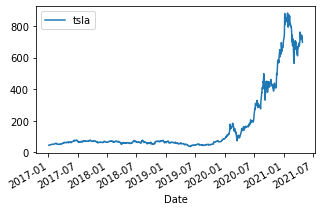

In [10]:
ticker = ['tsla']
start_date = '2017-01-01'
closes_tesla = get_adj_closes(ticker, start_date)
closes_tesla.plot(figsize=(5,3));
plt.legend(ticker);

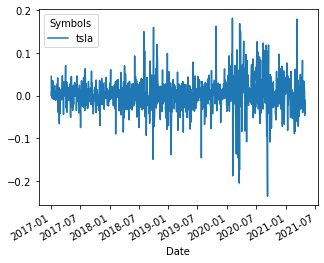

In [11]:
#Graficar rendimientos logarítmicos:
ret_tesla = calc_daily_ret(closes_tesla)
ret_tesla.plot(figsize=(5,4));

In [12]:
k = 700 
fecha = '2022-09-16'
indice_opt = tesla_opt.loc[(tesla_opt.Type=='put') & (tesla_opt.Strike==k) & (tesla_opt.Expiry==fecha)]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
3821,700.0,2022-09-16,put,...,2021-04-28 19:13:25,2021-04-28 13:58:42,"{'contractSymbol': 'TSLA220916P00700000', 'str..."


In [13]:
i_opt= indice_opt.index
opcion_valuar = tesla_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'TSLA220916P00700000',
 'strike': 700.0,
 'currency': 'USD',
 'lastPrice': 209.23,
 'change': -1.5299988,
 'percentChange': -0.7259436,
 'volume': 3,
 'openInterest': 1029,
 'bid': 208.15,
 'ask': 211.25,
 'contractSize': 'REGULAR',
 'expiration': 1663286400,
 'lastTradeDate': 1619618322,
 'impliedVolatility': 0.6486622658538819,
 'inTheMoney': True}

In [14]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  696.1519


### Simulación de precios usando rendimiento simple y logarítmico :

In [15]:
# Rendimiento simple:
Ri = closes_tesla.pct_change(1).iloc[1:]
# Media y desviación estándar de los rendimientos:
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri.head(3)

Symbols,tsla
Date,
2017-01-04,0.046
2017-01-05,-0.001
2017-01-06,0.010


In [16]:
today = pd.to_datetime(date.today())
# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry
len(pd.date_range(today, expiry, freq='B'))

363

In [17]:
# Encontrar la fecha de hoy en fomato timestamp
today = pd.to_datetime(date.today())
# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry
nscen = 10000
# Generar rangos de fechas de días hábiles
dates = pd.date_range(today, expiry, freq='B')
ndays = len(dates)

In [18]:
# Simular los rendimientos
# Rendimiento diario 
dt = 1
# Z ~ N(0,1) normal estándar (ndays, nscen)
Z = np.random.randn(ndays, nscen)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(Z * sigma_R * np.sqrt(dt) + mu_R * dt, index=dates)
Ri_dt.head(3)

,0,1,2,...,9997,9998,9999
2021-04-28,-0.054,0.040,0.030,...,-0.084,-0.033,0.023
2021-04-29,-0.005,0.004,0.042,...,0.017,-0.048,0.044
2021-04-30,0.046,0.016,0.010,...,-0.045,0.006,-0.017


In [19]:
S0 = opcion_valuar.Underlying_Price
S_T = S0*(Ri_dt + 1).cumprod()

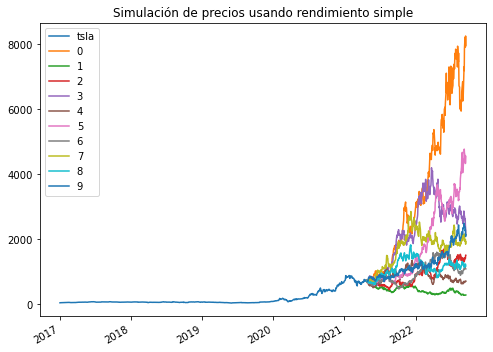

In [20]:
# Simulación del precio
S_0 = opcion_valuar.Underlying_Price
S_T = S_0*(1+Ri_dt).cumprod()
S_T.iloc[0,:] = S_0
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_tesla, S_T.iloc[:, :10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

### Simulación con rendimiento logarítmico:

In [21]:
Z.shape, len(dates)

((363, 10000), 363)

In [22]:
# Calcular rendimiento logarítmico
ri = calc_daily_ret(closes_tesla)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]
# Simulación del rendimiento
dt = 1
Z = np.random.randn(ndays, nscen)
sim_ret_ri = pd.DataFrame(mu_r * dt + Z * sigma_r * np.sqrt(dt), index=dates )
# Simulación del precio
S_0 = closes_tesla.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

822.5148267002309

In [23]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.03923000044026038, 0.03909351124211164)

### Con B&S:

In [24]:
mu = ret_tesla.mean()[0]
sigma = ret_tesla.std()[0]
mu, sigma

(0.0025563401177608976, 0.03909351124211164)

In [25]:
# Tasa de bonos de 1 yr de fecha 21/04/2021 -> 7%
r = 0.007/360 # Tasa diaria

In [26]:
today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry
dates = pd.date_range(start=today, end=expiry, freq='B')
ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-03',
               '2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07',
               '2021-05-10', '2021-05-11',
               ...
               '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
               '2022-09-15', '2022-09-16'],
              dtype='datetime64[ns]', length=363, freq='B')

In [27]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-04-28,0.077,-0.015,0.024,...,0.072,0.045,-0.012
2021-04-29,0.063,-0.007,0.082,...,0.020,0.032,-0.070
2021-04-30,0.060,-0.008,0.105,...,-0.002,0.059,-0.096
2021-05-03,0.061,-0.047,0.078,...,-0.051,0.096,-0.092
2021-05-04,0.062,0.027,0.039,...,-0.015,0.118,-0.065
...,...,...,...,...,...,...,...
2022-09-12,-1.726,1.371,-0.333,...,-0.611,0.524,0.504
2022-09-13,-1.680,1.378,-0.345,...,-0.604,0.466,0.527
2022-09-14,-1.682,1.428,-0.346,...,-0.572,0.446,0.500
2022-09-15,-1.708,1.372,-0.298,...,-0.648,0.474,0.521


In [28]:
S0 = closes_tesla.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0, :] = S0
sim_closes

,0,1,2,...,7,8,9
2021-04-28,696.870,696.870,696.870,...,696.870,696.870,696.870
2021-04-29,742.016,692.000,756.792,...,710.745,719.437,649.608
2021-04-30,740.090,691.473,773.904,...,695.199,739.407,633.066
2021-05-03,740.553,664.845,753.328,...,662.191,767.438,635.910
2021-05-04,741.390,715.902,724.878,...,686.289,784.098,653.042
...,...,...,...,...,...,...,...
2022-09-12,124.088,2745.902,499.378,...,378.268,1176.858,1154.122
2022-09-13,129.831,2764.198,493.651,...,380.954,1110.220,1179.877
2022-09-14,129.646,2906.763,493.036,...,393.456,1088.011,1148.867
2022-09-15,126.308,2747.728,517.327,...,364.355,1118.978,1173.162


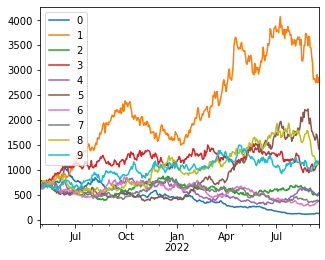

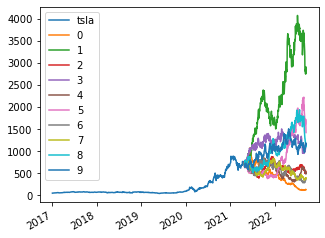

In [29]:
sim_closes.plot(figsize=(5,4));
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_tesla,sim_closes]).plot(figsize=(5,4));

In [30]:
opcion_valuar['JSON']

{'contractSymbol': 'TSLA220916P00700000',
 'strike': 700.0,
 'currency': 'USD',
 'lastPrice': 209.23,
 'change': -1.5299988,
 'percentChange': -0.7259436,
 'volume': 3,
 'openInterest': 1029,
 'bid': 208.15,
 'ask': 211.25,
 'contractSize': 'REGULAR',
 'expiration': 1663286400,
 'lastTradeDate': 1619618322,
 'impliedVolatility': 0.6486622658538819,
 'inTheMoney': True}

In [31]:
opcion_valuar

Strike                                                            700
Expiry                                            2022-09-16 00:00:00
Type                                                              put
Symbol                                            TSLA220916P00700000
Last                                                              209
                                          ...                        
Underlying                                                       TSLA
Underlying_Price                                                  696
Quote_Time                                        2021-04-28 19:13:25
Last_Trade_Date                                   2021-04-28 13:58:42
JSON                {'contractSymbol': 'TSLA220916P00700000', 'str...
Name: 3821, Length: 19, dtype: object

In [32]:
Hoy = date.today()
# strike price de la opción
K = opcion_valuar['JSON']['strike']  
# Fechas a simular
dates = pd.date_range(start= Hoy, periods = ndays, freq='B')
# Escenarios y número de días
ndays = len(dates)
nscen = 100000
# Condición inicial del precio a simular
S0 = closes_tesla.iloc[-1,0]  
# simular rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())



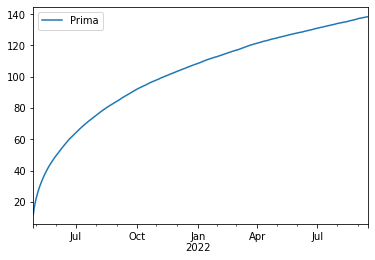

In [33]:
#PUT:
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(K-sim_closes, 0).mean(axis=1)}, index=dates)
put.plot();

In [34]:
put.iloc[-1]

Prima    138.374
Name: 2022-09-16 00:00:00, dtype: float64

In [35]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(131.92133093809116, 144.8264246928361)


### Usando técnicas de reducción de varianza:

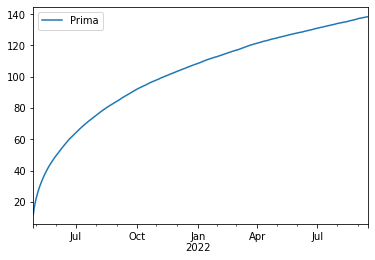

In [36]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [37]:
put.iloc[-1]

Prima    138.374
Name: 2022-09-16 00:00:00, dtype: float64

In [38]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(131.92133093809116, 144.8264246928361)


### Análisis de la distribución de los rendimientos:

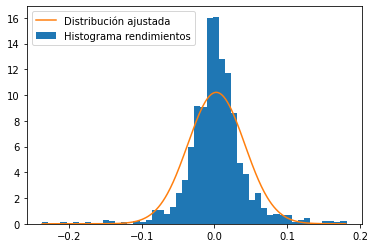

In [39]:
#AJUSTANDO_NORM
ren = calc_daily_ret(closes_tesla) # rendimientos 
y,x,_ = plt.hist(ren['tsla'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()



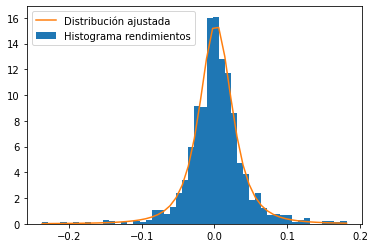

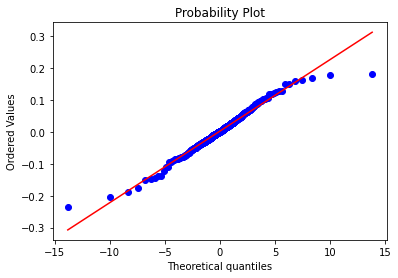

In [40]:
#AJUSTANDO_T:

# rendimientos 
ren = calc_daily_ret(closes_tesla) 
# Histograma de los rendimientos
y, x, _ = plt.hist(ren['tsla'], bins=50, density=True, label='Histograma rendimientos')
# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 
# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()
# Q-Q
st.probplot(ren['tsla'], sparams=params[:-2], dist=dist, plot=plt);

### Valuación usando simulación: uso del histograma de rendimientos:

In [41]:
ndays = len(dates) 
nscen = 10
#prob
prob = y/np.sum(y)
values = x[1:]
prob.sum()

0.9999999999999998

In [42]:
# Rendimientos simulados
ret = np.random.choice(values, ndays*nscen, p=prob)
# Fechas
dates = pd.date_range(start=Hoy,periods=ndays)
# Rendimien en Data Frame
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist.head(3)

,0,1,2,...,7,8,9
2021-04-28,0.031,0.014,0.056,...,0.006,-0.002,-0.002
2021-04-29,-0.069,0.023,-0.145,...,0.023,-0.044,-0.036
2021-04-30,0.031,-0.002,-0.044,...,-0.028,0.014,-0.019


In [43]:
sim_closes_hist = (closes_tesla.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist.head(3)

,0,1,2,...,7,8,9
2021-04-28,718.796,706.878,737.049,...,700.994,695.159,695.159
2021-04-29,670.648,723.049,637.841,...,717.031,665.065,670.648
2021-04-30,691.749,721.274,610.229,...,697.555,674.617,657.909


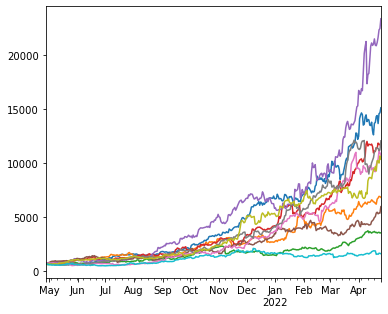

In [44]:
sim_closes_hist.plot(figsize=(6,5),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

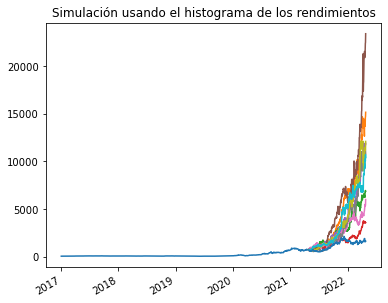

In [45]:
pd.concat([closes_tesla,sim_closes_hist]).plot(figsize=(6,5),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [46]:
K = opcion_valuar['JSON']['strike']
ndays = len(dates)
nscen = 100000
# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_tesla+r-mu, bins=2000)
prob = freq/np.sum(freq)
# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)
# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_tesla.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

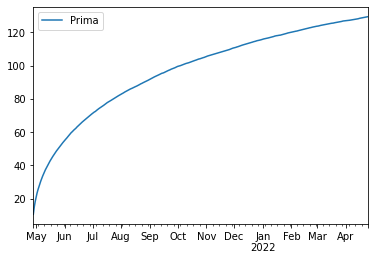

In [47]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [48]:
put_hist.iloc[-1]

Prima    129.421
Name: 2022-04-25 00:00:00, dtype: float64

In [49]:
opcion_valuar['JSON']

{'contractSymbol': 'TSLA220916P00700000',
 'strike': 700.0,
 'currency': 'USD',
 'lastPrice': 209.23,
 'change': -1.5299988,
 'percentChange': -0.7259436,
 'volume': 3,
 'openInterest': 1029,
 'bid': 208.15,
 'ask': 211.25,
 'contractSize': 'REGULAR',
 'expiration': 1663286400,
 'lastTradeDate': 1619618322,
 'impliedVolatility': 0.6486622658538819,
 'inTheMoney': True}

In [50]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)

(124.19803240657231, 134.64384274882505)


## Black Scholes:  

In [61]:
#Resolver d1 con datos previos:
v = ren["tsla"].std()*np.sqrt(252) #para anualizar
st = p
d1 = ((fr+(v**2)/2)+np.log(st/k))/v
#resolver d2:
d2 = (d1-v)
#bs:
p1 = (np.exp(-fr)*norm.cdf(-d2)*700)
p2 = (st*norm.cdf(-d1))
bs = p1-p2
bs

168.98378876389097

## Comparación: 

In [62]:
#DataFrame con resultado final:
df = pd.DataFrame(index=['Valor'], columns = ['Black scholes', 'Simulación'])
df['Black scholes'] = bs
df['Simulación'] = put_hist.iloc[-1].values
df

,Black scholes,Simulación
Valor,168.984,129.421
